<a href="https://colab.research.google.com/github/padobrik/2de-processing/blob/main/proccesing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt
import torchvision
from PIL import Image
import io
from sklearn.preprocessing import normalize

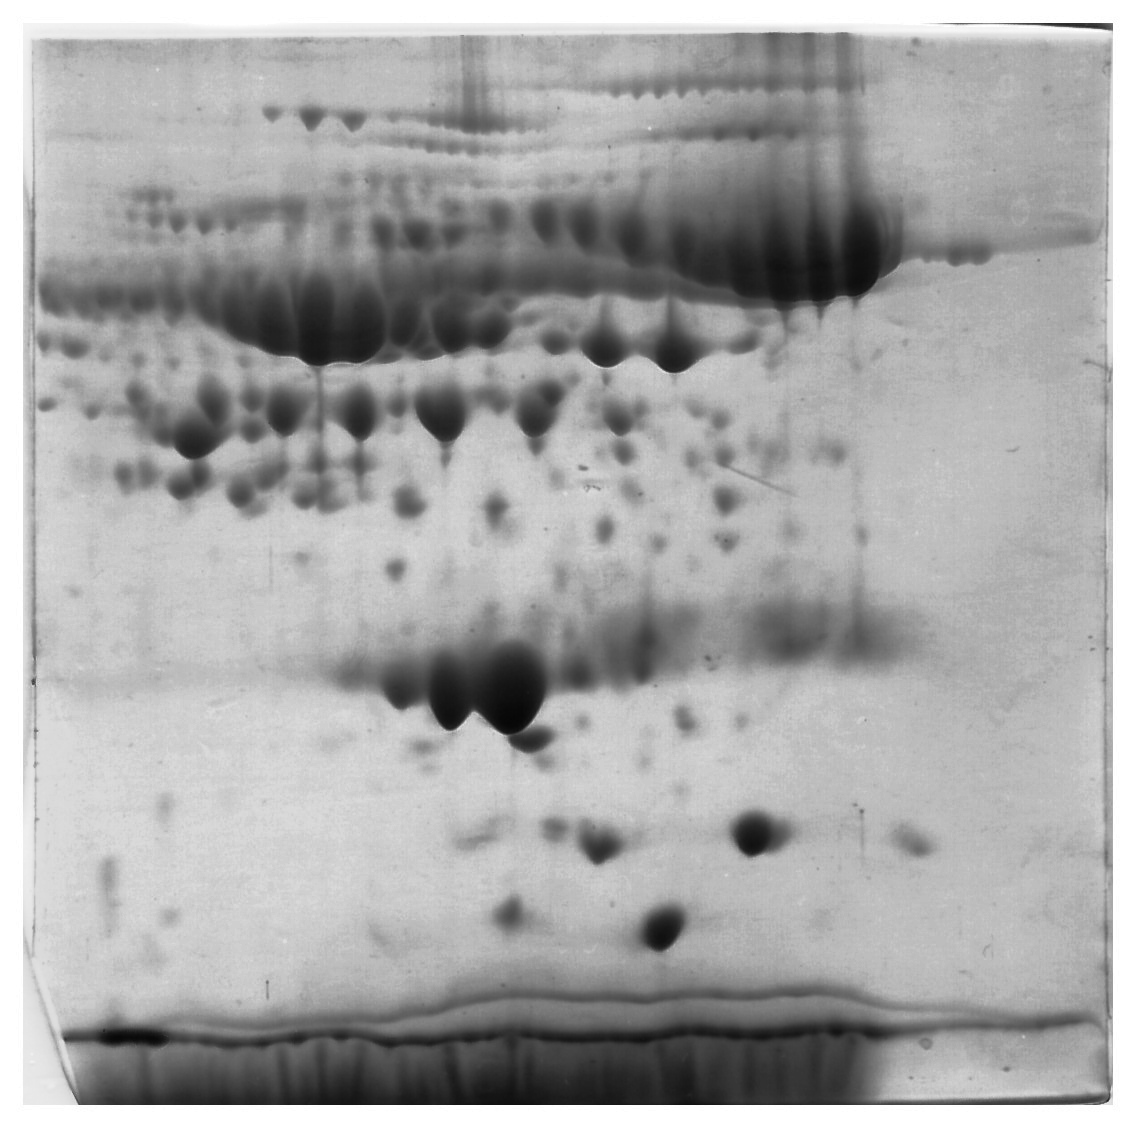

In [517]:
def read_image(path: str) -> np.ndarray:
  image = cv2.imread(path)
  grayscale = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

  return grayscale

def clahe(image: np.ndarray, clip_limit: int, grid: tuple) -> np.ndarray:
  CLAHE = cv2.createCLAHE(clipLimit=clip_limit, tileGridSize=grid)
  return CLAHE.apply(image)

def threshold(image: np.ndarray, thresh: int, maxval: int, thresh_type = cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU) -> np.ndarray:
  _, with_threshold = cv2.threshold(image, thresh, maxval, thresh_type)
  return with_threshold

image = read_image('test.tiff')
with_clahe = clahe(image, 2.5, (1,1))
with_threshold = threshold(with_clahe, 0, 255)

cv2_imshow(with_clahe)

In [948]:
def adaptive_threshold(image: np.ndarray, 
                       max_value: int, 
                       pixel_neighbors: int,
                       C: int,
                       method = cv2.ADAPTIVE_THRESH_MEAN_C, 
                       thresh_type = cv2.THRESH_BINARY) -> np.ndarray:
  return cv2.adaptiveThreshold(image, max_value, method, thresh_type, pixel_neighbors, C)

In [949]:
def apply_morphology(image: np.ndarray, minimum = (1, 1), maximum = (20, 20)) -> np.ndarray:
  kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, minimum)
  blob = cv2.morphologyEx(image, cv2.MORPH_OPEN, kernel)
  kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, maximum)
  blob = cv2.morphologyEx(blob, cv2.MORPH_CLOSE, kernel)
  blob = 255 - blob
  return blob

In [950]:
def get_contours(blob):
  cnts, contours = cv2.findContours(blob, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
  return cnts

In [951]:
def draw_contours(image, cnts):
  plt.figure(figsize = (12,12))
  plt.imshow(cv2.drawContours(image, cnts, -1, (0, 255, 0), 1), cmap='gray')

In [1004]:
image = read_image('test.tiff')
with_clahe = clahe(image, 2, (7,7))

In [1005]:
adaptive = adaptive_threshold(with_clahe, 255, 75, 5)

In [1006]:
blob = apply_morphology(adaptive)

In [1007]:
contours = get_contours(blob)

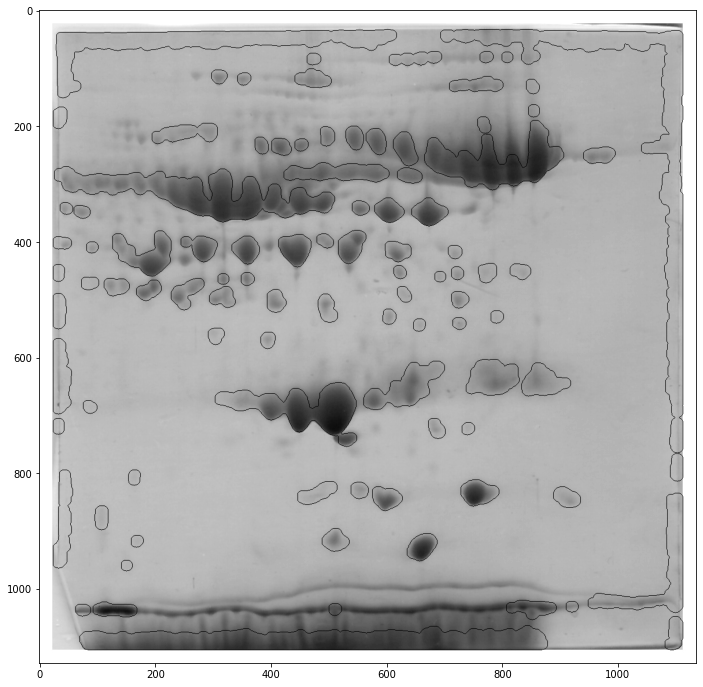

In [1008]:
draw_contours(image, contours)

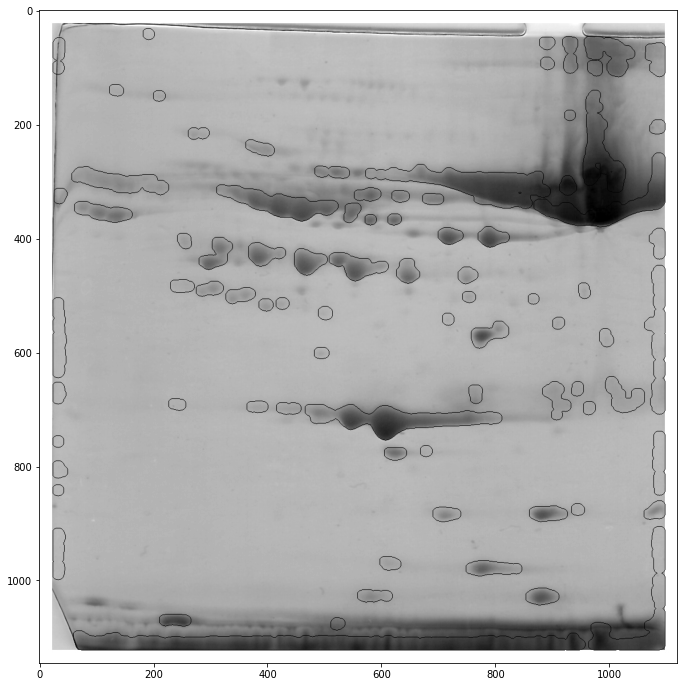

In [1022]:
image = read_image('test2.tiff')
with_clahe = clahe(image, 2, (7,7))

adaptive = adaptive_threshold(with_clahe, 255, 53, 3)

blob = apply_morphology(adaptive)

contours = get_contours(blob)

draw_contours(image, contours)